<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Gender-Classification-Project-/blob/master/Gender_Classification_Using_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading DataSet**

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -uq "drive/My Drive/train_n.zip"

In [ ]:
# read the data
data = pd.read_csv("train.csv")

In [ ]:
# Create random number generator
seed = 42

In [ ]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
# Distribution of classes in the dataset
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
# load images and store it in numpy array

from numpy import asarray
from PIL import Image
from keras.preprocessing import image

X = []
for img in data.image_names:
    img = image.load_img('images/' + img, target_size=(50, 50, 3))
    img = image.img_to_array(img)
    X.append(img)
    
X=np.array(X)

# Storing the target variable in saperate variable
y = data['class'].values


In [ ]:
# shape of the image
X.shape, y.shape

((12196, 50, 50, 3), (12196,))

In [ ]:
# Minimum and maximum pixel value of images
X.min(), X.max()

(0.0, 255.0)

In [ ]:
X = X/255.0

In [ ]:
X.min(), X.max()

(0.0, 1.0)

# **Creating training and validation set**

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 50, 50, 3), (8537,)), ((3659, 50, 50, 3), (3659,)))

# **Augmenting Images**

In [ ]:
# augmenting the training images
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train.shape[0])):
    # original image
    final_train_data.append(X_train[i])
    # image rotation
    final_train_data.append(rotate(X_train[i], angle=30, mode = 'edge'))
    # image flipping (left-to-right)    
    final_train_data.append(np.fliplr(X_train[i]))
    # image flipping (up-down) 
    final_train_data.append(np.flipud(X_train[i]))
    # image noising
    final_train_data.append(random_noise(X_train[i],var=0.2))
    for j in range(5):
        final_target_train.append(y_train[i])

100%|██████████| 8537/8537 [00:07<00:00, 1121.43it/s]


In [ ]:
# converting images and target to array
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [ ]:
# shape of new training set
final_train.shape, final_target_train.shape 

((42685, 50, 50, 3), (42685,))

In [ ]:
# converting 3 dimensional image to 1 dimensional image
final_train = final_train.reshape(final_train.shape[0], 50*50*3)
final_train.shape

(42685, 7500)

In [ ]:
# minimum and maximum pixel values of training images
final_train.min(), final_train.max()

(0.0, 1.0)

In [ ]:
# converting 3 dimensional validation image to 1 dimensional image
final_valid = X_valid.reshape(X_valid.shape[0], 50*50*3)
final_valid.shape

(3659, 7500)

In [ ]:
# minimum and maximum pixel values of validation images
final_valid.min(), final_valid.max()

(0.0, 1.0)

# **Defining the model architecture**

In [ ]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# defining and compiling the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(50*50*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               750100    
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

# **Training the model**

In [ ]:
# training the model
model_history = model.fit(final_train, final_target_train, epochs=50, batch_size=128,validation_data=(final_valid,y_valid))

Epoch 1/50
334/334 [==============================] - 2s 6ms/step - loss: 0.8698 - accuracy: 0.5932 - val_loss: 0.5872 - val_accuracy: 0.7237
Epoch 2/50
334/334 [==============================] - 2s 5ms/step - loss: 0.8068 - accuracy: 0.6260 - val_loss: 0.5493 - val_accuracy: 0.7333
Epoch 3/50
334/334 [==============================] - 2s 5ms/step - loss: 0.7835 - accuracy: 0.6362 - val_loss: 0.5433 - val_accuracy: 0.7415
Epoch 4/50
334/334 [==============================] - 2s 5ms/step - loss: 0.7603 - accuracy: 0.6437 - val_loss: 0.5314 - val_accuracy: 0.7483
Epoch 5/50
334/334 [==============================] - 2s 5ms/step - loss: 0.7444 - accuracy: 0.6483 - val_loss: 0.5293 - val_accuracy: 0.7395
Epoch 6/50
334/334 [==============================] - 2s 5ms/step - loss: 0.7377 - accuracy: 0.6504 - val_loss: 0.5206 - val_accuracy: 0.7450
Epoch 7/50
334/334 [==============================] - 2s 5ms/step - loss: 0.7198 - accuracy: 0.6585 - val_loss: 0.5173 - val_accuracy: 0.7480
Epoch 

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(final_valid)[:, 0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.7849139109046187 %


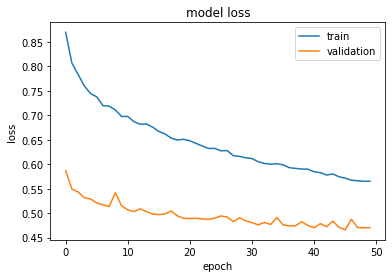

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

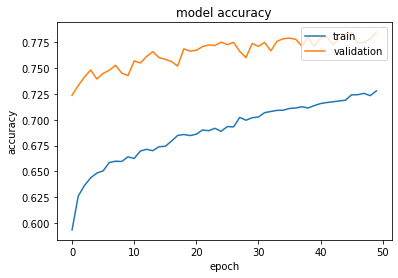

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()